In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

colnames=["erythema", "scaling","definite borders","itching","koebner phenomenon","polygonal papules",
           "follicular papules","oral mucosal involvement","knee and elbow involvement","scalp involvement",
           "family history, (0 or 1)","melanin incontinence","eosinophils in the infiltrate","PNL infiltrate",
           "fibrosis of the papillary dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis",
           "clubbing of the rete ridges","elongation of the rete ridges","thinning of the suprapapillary epidermis",
           "spongiform pustule","munro microabcess","focal hypergranulosis","disappearance of the granular layer",
           "vacuolisation and damage of basal layer", "spongiosis","saw-tooth appearance of retes","follicular horn plug",
           "perifollicular parakeratosis","inflammatory monoluclear inflitrate", "band-like infiltrate","Age", "target"]
dermoFrame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data',header=None)
dermoFrame.columns = colnames #Dataframe'e sütun isimleri eklendi

In [12]:
dermoFrame.replace('?', np.nan, inplace=True)
dermoFrame=dermoFrame.dropna(axis=0) #Herhangi bir verisi NaN value olan satırı silme

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

X= dermoFrame[dermoFrame.columns[0:34]] #data values
y= dermoFrame[dermoFrame.columns[34]]  #target value

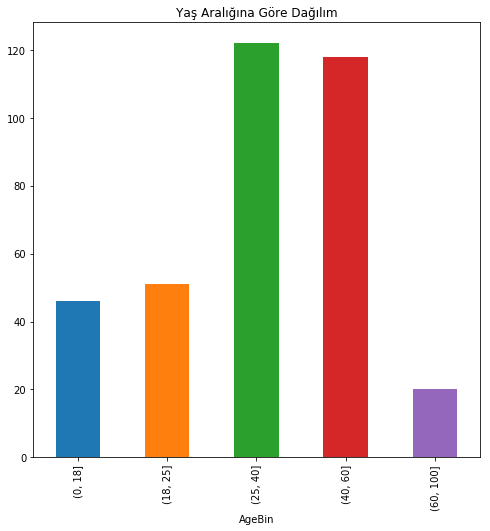

In [14]:
age_bin = [0,18,25,40,60,100] #yaş aralıklarını tanımlamak için

df=pd.DataFrame()
df['AgeBin'] = pd.cut(dermoFrame.Age.astype(int), bins = age_bin)
groups = df.groupby(['AgeBin']).size()
groups.plot.bar( fontsize=10, figsize=(8, 8), title="Yaş Aralığına Göre Dağılım")
plt.show()

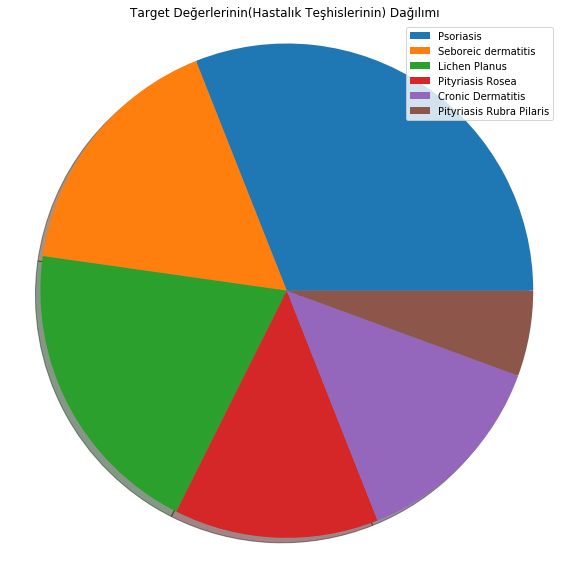

In [15]:
labels = ['Psoriasis', 'Seboreic dermatitis', 'Lichen Planus', 'Pityriasis Rosea','Cronic Dermatitis','Pityriasis Rubra Pilaris']
plt.figure(figsize=(8, 8))
plt.title("Target Değerlerinin(Hastalık Teşhislerinin) Dağılımı")
patches, texts = plt.pie(dermoFrame.groupby(['target']).size(), shadow=True) #Target değerlerine göre groupby yapılır
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#train ve test split edildi
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, model.predict(X_test))
print("Accuracy score : ", ac)

Accuracy score :  0.9444444444444444


In [18]:
from sklearn.model_selection import cross_val_score
f1_score = cross_val_score(model, X, y, cv=10, scoring="f1_micro") #cv=10, 10-fold anlamına gelir
print('F1 score : ', f1_score)
print('F1 score ortalaması : ', f1_score.mean())                                   

F1 score :  [0.94736842 0.80555556 1.         0.97222222 0.86111111 0.91666667
 0.97222222 0.97222222 1.         0.91176471]
F1 score ortalaması :  0.9359133126934985


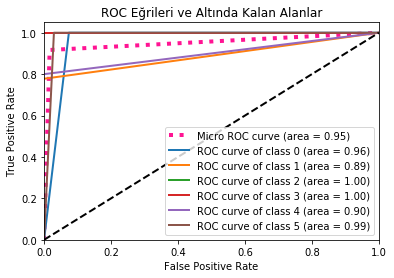

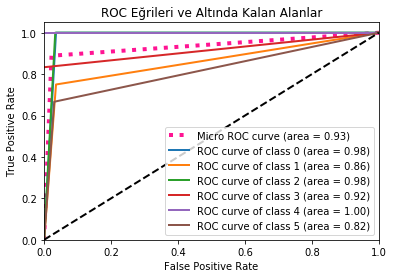

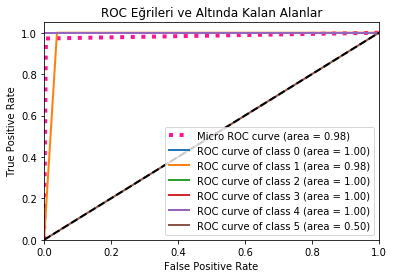

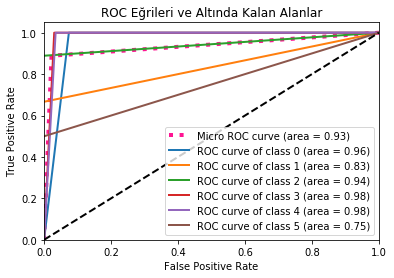

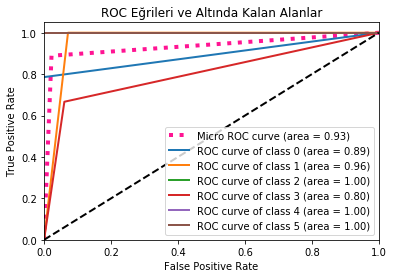

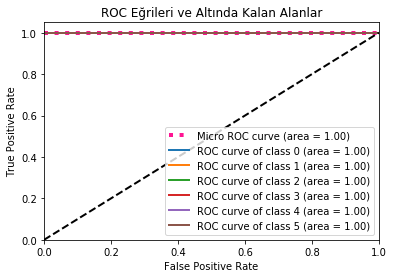

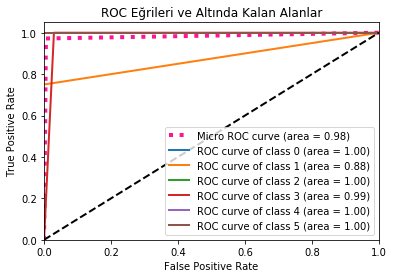

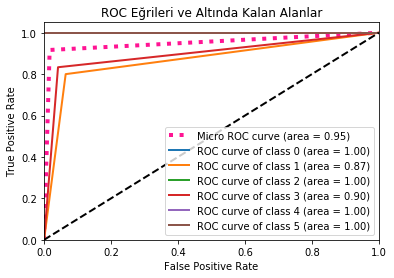

C:\Users\onati\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


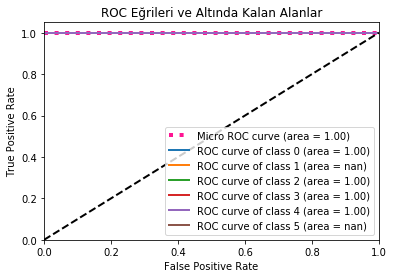

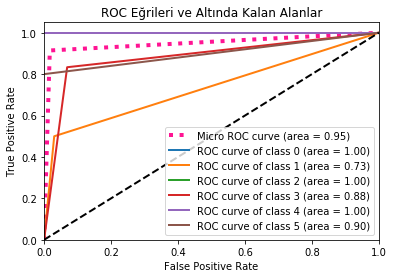

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

kf = KFold(n_splits=10)
y = label_binarize(y, classes=[1,2,3,4,5,6])
n_classes = y.shape[1]
model = DecisionTreeClassifier(criterion='entropy')

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area (Micro yerine'average' yazılarak average değer hesaplanabilir)
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='Micro ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
    
    # Her bir ROC eğrisi çizilir
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrileri ve Altında Kalan Alanlar')
    plt.legend(loc="lower right")
    plt.show()


In [20]:
from sklearn.tree import export_graphviz
features = dermoFrame.columns[0:34]
target = dermoFrame.columns[34]
export_graphviz(model, out_file='dec_tree.dot', feature_names=features, class_names=target)
